In [11]:
from pprint import pprint

import pandas as pd
from source.utils.dataframes import enhance_descrip as ed
from source.utils.dataframes import calculate_var_coeff as calc_vc
from source.utils.dataframes import corners, print_md_table, sort_by_margins, drop_margins
from source.utils.dataframes import transform_counts as transform
from source.utils.general import print_iter, timestamp_now as tnow
from source.utils.visualize import heatmap

pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 120) 
pd.set_option('display.max_colwidth', 3)

In [12]:
def clean_data(df):
    # df.columns = df.columns.str.strip()
    if 'adj_form_lower' in df.columns: 
        df = df.set_index('adj_form_lower')
    else: 
        df.index.name == df.index.name or 'adj_form_lower'
    df.columns.name = df.columns.name or 'adv_form_lower'
    return df

# Loaded variable 'df' from URI: /home/arh234/projects/sanpi/results/freq_out/RBXadj/all_adj-x-adv_frq-thr0-001p.35f=868+.csv
df = pd.read_csv(r'/share/compling/projects/sanpi/results/freq_out/RBXadj/all_adj-x-adv_frq-thr0-001p.35f=868+.csv')

df_clean = clean_data(df.copy())
df_clean.iloc[:21, :11]

adv_form_lower,SUM,very,more,most,so,not,as,too,really,much,pretty
adj_form_lower,,,,,,,,,,,
SUM,83284343,9913432,9320997,7568812,5735964,4415785,3709914,3557440,2096057,1986728,1621748
many,2210387,21237,373,140,1191864,58442,434631,450194,518,201,54
important,2199447,359610,306604,748533,105509,17351,102823,12879,72175,1826,6594
good,2030480,507499,18902,5207,153196,96143,235348,59683,260281,14343,243692
much,1776924,42365,102,22,614652,66410,355368,583184,3066,284,57884
likely,1048364,35899,498401,192635,847,46858,31820,1196,466,259,1312
more,1028133,69,2280,90,2953,17641,2851,52,4561,355655,14
different,906600,233008,12237,1364,39346,4024,9296,5198,6545,44251,2140
available,862942,403,9739,1384,490,132371,1879,277,552,979,32


In [13]:
corners(drop_margins(df_clean), 3)

adv_form_lower,very,more,most,...,second-most,cosmetically,pointedly
adj_form_lower,,,,,,,
many,21237,373,140,...,0,0,0
important,359610,306604,748533,...,105,9,0
good,507499,18902,5207,...,0,7,0
...,...,...,...,...,...,...,...
contiguous,4,106,8,...,0,0,0
panicked,54,159,31,...,0,0,0
oversized,32,45,16,...,0,0,0


In [14]:
print_md_table(corners(df_clean, 4), comma=True)
#^ this will not treat the numbers as "floats", so the `comma` and `n_dec` arguments do nothing. 
#^  I believe this is because `corners`, by insterting the '...' row, returns a dataframe where the dtypes are all "object" instead of numerical
#^ [ ] LATER I have ideas on how to make this work with the string manipulations... but I'm NOT doing that right now. 😤

| adj_form_lower   | SUM      | very    | more    | most    | ...   | emphatically   | second-most   | cosmetically   | pointedly   |
|:-----------------|:---------|:--------|:--------|:--------|:------|:---------------|:--------------|:---------------|:------------|
| SUM              | 83284343 | 9913432 | 9320997 | 7568812 | ...   | 872            | 869           | 869            | 868         |
| many             | 2210387  | 21237   | 373     | 140     | ...   | 3              | 0             | 0              | 0           |
| important        | 2199447  | 359610  | 306604  | 748533  | ...   | 2              | 105           | 9              | 0           |
| good             | 2030480  | 507499  | 18902   | 5207    | ...   | 6              | 0             | 7              | 0           |
| ...              | ...      | ...     | ...     | ...     | ...   | ...            | ...           | ...            | ...         |
| carnal           | 872      | 34      | 150     | 62      | 

In [46]:
drop_margins(df_clean.iloc[1:, 1:])
corners(no_sum)

adv_form_lower,very,more,most,so,not,...,on,emphatically,second-most,cosmetically,pointedly
adj_form_lower,,,,,,,,,,,
many,21237,373,140,1191864,58442,...,1,3,0,0,0
important,359610,306604,748533,105509,17351,...,0,2,105,9,0
good,507499,18902,5207,153196,96143,...,1,6,0,7,0
much,42365,102,22,614652,66410,...,95,0,0,0,1
likely,35899,498401,192635,847,46858,...,0,0,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...
untrained,9,10,43,11,5,...,0,0,0,0,0
carnal,34,150,62,27,234,...,0,0,0,0,0
contiguous,4,106,8,6,200,...,0,0,0,0,0


In [16]:
print_md_table(ed(no_sum.iloc[:, :8]).T.sort_values('very'))

|              |      very |      more |      most |        so |       not |        as |       too |    really |
|:-------------|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|
| lower_fence  |      -916 |    -1,379 |      -783 |      -487 |      -358 |      -375 |      -204 |      -136 |
| min          |         0 |         0 |         0 |         0 |         0 |         0 |         0 |         0 |
| var_coeff    |         6 |         5 |         9 |        15 |         9 |        11 |        14 |        10 |
| 25%          |        43 |       106 |        39 |        32 |        20 |        28 |         8 |         8 |
| median       |       155 |       322 |       145 |       112 |        69 |        90 |        37 |        27 |
| IQ_range     |       639 |       990 |       548 |       346 |       252 |       269 |       141 |        96 |
| 75%          |       682 |     1,096 |       587 |       378 |       272 |       297 |       1

In [17]:
print_iter([a.name for a in no_sum.axes], header='Axes')


Axes
▸ adj_form_lower
▸ adv_form_lower


In [48]:
def get_vc_outliers(frq_df):
    var_outliers = {}
    for df in (frq_df, frq_df.T): 
        label = df.columns.name
        print(f'\n>> {label}')
        vc = df.apply(calc_vc).sort_values(ascending=False)

        print(vc.head().to_frame('var_coeff').to_markdown(floatfmt='.1f'))
        is_outlier = vc > ed(vc.to_frame()).squeeze()['upper_fence']

        var_outliers[label] = vc.loc[is_outlier].index.to_list()
        
    return var_outliers

var_outliers = get_vc_outliers(no_sum.copy())


>> adv_form_lower
| adv_form_lower   |   var_coeff |
|:-----------------|------------:|
| chock            |        62.4 |
| scantily         |        62.0 |
| crystal          |        62.0 |
| proof            |        60.6 |
| upwardly         |        59.9 |

>> adj_form_lower
| adj_form_lower   |   var_coeff |
|:-----------------|------------:|
| away             |        31.5 |
| wanted           |        31.3 |
| marrow           |        31.1 |
| own              |        31.1 |
| first            |        30.2 |


In [19]:
def show_outliers(high_var_words, pos, n=15):
    print(f'### {pos} outliers based on variability coefficient\n')
    print(f'total: {len(high_var_words)}')

    print_iter(high_var_words[:n], header=f'Top {n} Most Variable {pos[:3].upper()}')
    print()

show_outliers(var_outliers['adj_form_lower'], 'adj_form_lower')


### adj_form_lower outliers based on variability coefficient

total: 151

Top 15 Most Variable ADJ
▸ away
▸ wanted
▸ marrow
▸ own
▸ first
▸ earliest
▸ intentioned
▸ populous
▸ inconsiderable
▸ latest
▸ same
▸ distinguishing
▸ binding
▸ chopped
▸ unreleased



In [20]:
show_outliers(var_outliers['adv_form_lower'], 'adv_form_lower')

### adv_form_lower outliers based on variability coefficient

total: 77

Top 15 Most Variable ADV
▸ chock
▸ scantily
▸ crystal
▸ proof
▸ upwardly
▸ brand
▸ hiv
▸ spotlessly
▸ wide
▸ funnily
▸ at
▸ red
▸ thinly
▸ vitally
▸ terminally



In [21]:
no_sum.loc[var_outliers[no_sum.index.name], :]

adv_form_lower,very,more,most,so,not,as,too,really,much,pretty,...,scandalously,urgently,intolerably,madly,touchingly,on,emphatically,second-most,cosmetically,pointedly
adj_form_lower,,,,,,,,,,,,,,,,,,,,,
away,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wanted,6,16,3371,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
marrow,16,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
own,95941,90,52,15,112,2,10,125,15,25,...,0,0,0,0,0,2,0,0,0,0
first,150034,1456,1066,105,160,59,14,260,145,64,...,0,1,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
favourite,811,59,2135,40,16,71,0,2,2,1,...,0,0,0,0,0,0,0,0,0,0
particular,9563,1500,431,631,621,179,292,287,37,166,...,1,0,0,0,0,0,0,0,0,0
substantive,334,3104,602,21,182,75,17,70,35,35,...,0,0,0,0,0,0,0,0,0,0


In [22]:
no_sum.loc[:, var_outliers[no_sum.columns.name]]

adv_form_lower,chock,scantily,crystal,proof,upwardly,brand,hiv,spotlessly,wide,funnily,...,below,solely,lawfully,little,nowhere,unacceptably,widely,verbally,technologically,grammatically
adj_form_lower,,,,,,,,,,,,,,,,,,,,,
many,0,0,0,0,0,0,0,0,0,0,...,4,2,0,1,2,2,1,3,1,0
important,0,0,0,0,0,0,0,0,1,0,...,1,10,0,8,17,0,19,0,62,3
good,0,0,0,0,1,0,0,1,1,0,...,7,31,4,120,111,1,2,2,3,1
much,0,0,0,0,0,2,0,0,2,0,...,10,0,0,3,6,0,1,1,0,0
likely,0,0,0,0,0,0,0,0,0,0,...,0,3,0,26,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
untrained,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
carnal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
contiguous,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
def get_preferred(axis_name:str, 
                  outliers:list, 
                  df:pd.DataFrame, 
                  n:int=1):
    # print(df.sample(n).iloc[:, :n].to_markdown(floatfmt=',.0f'))
    df = (df if df.columns.name == axis_name
          else df.transpose())
    # print(df.sample(n).iloc[:, :n].to_markdown(floatfmt=',.0f'))
    prefer = []
    for ad in outliers: 
        print(f'\n### {ad}\n')
        
        top_n = df[ad].sort_values(ascending=False).head(n)
        top_n.index.name = 'top collocates'
        print(top_n.to_markdown(floatfmt=',.0f'))
        prefer += top_n.index.to_list()
    return df.loc[df.index.isin(set(prefer)), outliers]

adj_outlier_df = get_preferred('adj_form_lower', var_outliers['adj_form_lower'], no_sum.copy()).T



### away

| top collocates   |   away |
|:-----------------|-------:|
| far              |  1,284 |

### wanted

| top collocates   |   wanted |
|:-----------------|---------:|
| most             |    3,371 |

### marrow

| top collocates   |   marrow |
|:-----------------|---------:|
| bone             |    1,147 |

### own

| top collocates   |    own |
|:-----------------|-------:|
| very             | 95,941 |

### first

| top collocates   |   first |
|:-----------------|--------:|
| very             | 150,034 |

### earliest

| top collocates   |   earliest |
|:-----------------|-----------:|
| very             |      2,091 |

### intentioned

| top collocates   |   intentioned |
|:-----------------|--------------:|
| well             |         1,786 |

### populous

| top collocates   |   populous |
|:-----------------|-----------:|
| most             |     29,436 |

### inconsiderable

| top collocates   |   inconsiderable |
|:-----------------|-----------------:|
| not       

In [24]:
adj_outlier_df.iloc[:20, :15]

adv_form_lower,very,more,most,so,not,as,too,much,pretty,even,still,highly,just,far,now
adj_form_lower,,,,,,,,,,,,,,,
away,0,0,0,0,0,0,0,0,0,0,0,0,0,1284,0
wanted,6,16,3371,4,0,1,0,0,0,0,1,1,0,0,0
marrow,16,1,0,0,0,0,1,0,0,0,0,0,1,0,0
own,95941,90,52,15,112,2,10,15,25,30,60,2,7,0,92
first,150034,1456,1066,105,160,59,14,145,64,236,69,9,53,19,70
earliest,2091,2,20,1,2,9,0,0,2,2,0,0,0,0,3
intentioned,1,3,1,1,1,1,0,0,0,1,1,0,1,0,0
populous,137,1693,29436,66,12,145,32,3,4,1,3,69,1,0,6
inconsiderable,33,1,9,25,927,4,9,0,0,0,0,0,1,0,0


In [56]:
# from matplotlib import pyplot as plt
# plt.hist2d(adj_outlier_df.iloc[:, 0], adj_outlier_df.iloc[:, 1])
# plt.show()

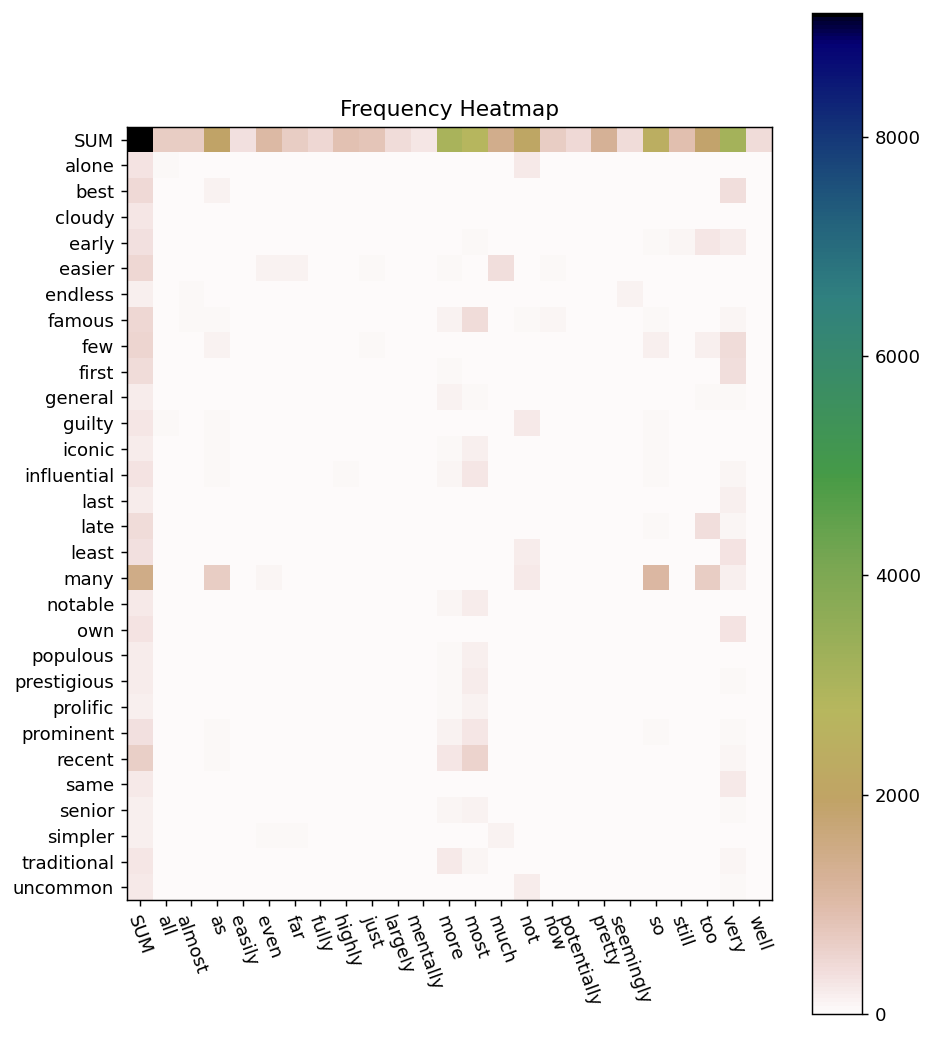

In [59]:
heatmap(transform(adj_outlier_df.iloc[:30, :25]))

In [25]:
adv_outlier_df = get_preferred('adv_form_lower', var_outliers['adv_form_lower'], no_sum.copy())


### chock

| top collocates   |   chock |
|:-----------------|--------:|
| full             |   1,288 |

### scantily

| top collocates   |   scantily |
|:-----------------|-----------:|
| clad             |      5,367 |

### crystal

| top collocates   |   crystal |
|:-----------------|----------:|
| clear            |     7,566 |

### proof

| top collocates   |   proof |
|:-----------------|--------:|
| positive         |   1,543 |

### upwardly

| top collocates   |   upwardly |
|:-----------------|-----------:|
| mobile           |      2,098 |

### brand

| top collocates   |   brand |
|:-----------------|--------:|
| new              |  13,868 |

### hiv

| top collocates   |   hiv |
|:-----------------|------:|
| positive         | 1,085 |

### spotlessly

| top collocates   |   spotlessly |
|:-----------------|-------------:|
| clean            |        1,520 |

### wide

| top collocates   |   wide |
|:-----------------|-------:|
| open             | 30,703 |

### funnily

|

In [26]:
corners(adv_outlier_df)

adv_form_lower,chock,scantily,crystal,proof,upwardly,...,unacceptably,widely,verbally,technologically,grammatically
adj_form_lower,,,,,,,,,,,
important,0,0,0,0,0,...,0,19,0,62,3
more,0,0,0,0,0,...,1,5,2,2,0
different,0,0,0,0,0,...,3,1782,1,20,12
available,0,4,0,0,0,...,0,24801,0,20,0
high,0,0,0,0,0,...,2342,2,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...
proportional,0,0,0,0,0,...,0,0,0,0,0
populated,0,2,0,0,0,...,0,0,0,0,0
lit,0,1,0,0,0,...,0,0,0,0,0


In [27]:
    def drop_sums(_df):
        return _df.filter(regex=r'[a-z]', axis=1).filter(regex=r'[a-z]', axis=0)

In [28]:
def sort_by_orig_sums(df, orig_df): 
    
    df['SUM'] = orig_df.loc[df.index, 'SUM']
    df.loc['SUM', :] = orig_df.loc['SUM', df.columns]
    return sort_by_margins(df).apply(pd.to_numeric, downcast='unsigned')

In [29]:
adv_outlier_df = sort_by_orig_sums(adv_outlier_df, df_clean)
adv_outlier_df

adv_form_lower,SUM,readily,partly,widely,openly,little,publicly,wide,closely,statistically,...,pearly,hiv,immaculately,infinitesimally,confusingly,backward,red,loud,lawfully,funnily
adj_form_lower,,,,,,,,,,,,,,,,,,,,,
SUM,83284343,86862,78609,45294,39295,37235,33966,32734,30603,27097,...,1165,1140,1135,1069,1061,1057,1041,993,970,904
important,2199447,2,3,19,0,8,32,1,4,55,...,0,0,0,0,0,0,0,0,0,0
more,1028133,3,6,5,0,21317,4,5,4,48,...,0,0,0,3,0,6,2,37,0,0
different,906600,4,37,1782,4,1459,2,0,8,470,...,0,0,0,8,7,0,0,0,0,1
available,862942,65655,27,24801,850,6,22280,17,6,2,...,0,0,1,0,1,0,3,0,54,0
high,586188,1,2,2,1,26,0,0,0,38,...,0,0,1,0,1,1,0,0,0,0
clear,489305,55,39,6,7,1,74,0,0,12,...,0,0,9,0,0,0,0,4,0,0
close,478041,3,10,0,4,1,3,2,6,25,...,0,0,1,14,13,1,0,0,0,0
enough,450646,26,1,108,5,3,5,538,306,6,...,1,0,0,0,10,7,0,121,0,835


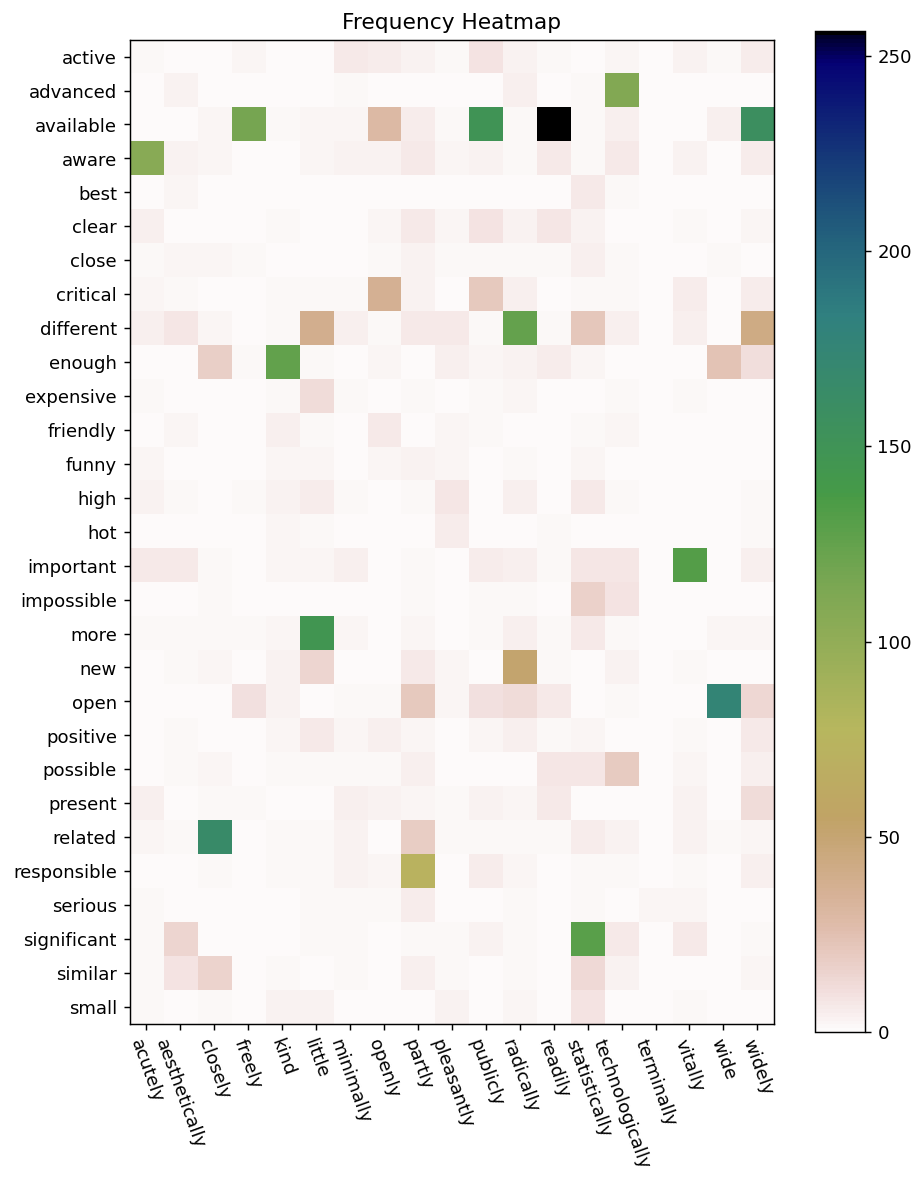

In [30]:
heatmap(transform(drop_sums(adv_outlier_df.iloc[:30, :20]), method='sqrt'))

In [31]:
adj_outlier_df = sort_by_orig_sums(adj_outlier_df, df_clean)
adj_outlier_df

adv_form_lower,SUM,very,more,most,so,not,as,too,much,pretty,...,previously,legally,kind,desperately,religiously,scantily,finely,tightly,thinly,bone
adj_form_lower,,,,,,,,,,,,,,,,,,,,,
SUM,83284343,9913432,9320997,7568812,5735964,4415785,3709914,3557440,1986728,1621748,...,73337,36949,18849,13003,7160,5400,4273,2955,1705,1387
many,2210387,21237,373,140,1191864,58442,434631,450194,201,54,...,65,5,5,7,0,0,0,3,1,0
recent,401861,5601,63688,313185,814,268,1845,681,681,341,...,0,1,0,0,0,0,0,0,0,0
few,271527,170268,91,39,26749,246,15613,24101,14,98,...,25,0,1,9,0,0,0,0,0,0
famous,241798,11159,14949,165181,4918,1559,4745,505,357,905,...,36,0,0,0,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
leeway,983,0,837,24,1,1,0,0,32,0,...,0,0,0,0,0,0,0,0,0,0
used,957,12,17,10,628,15,17,36,0,1,...,1,0,0,0,0,0,0,0,0,0
left,941,74,65,12,2,0,2,1,36,10,...,0,0,0,0,0,0,0,0,0,0


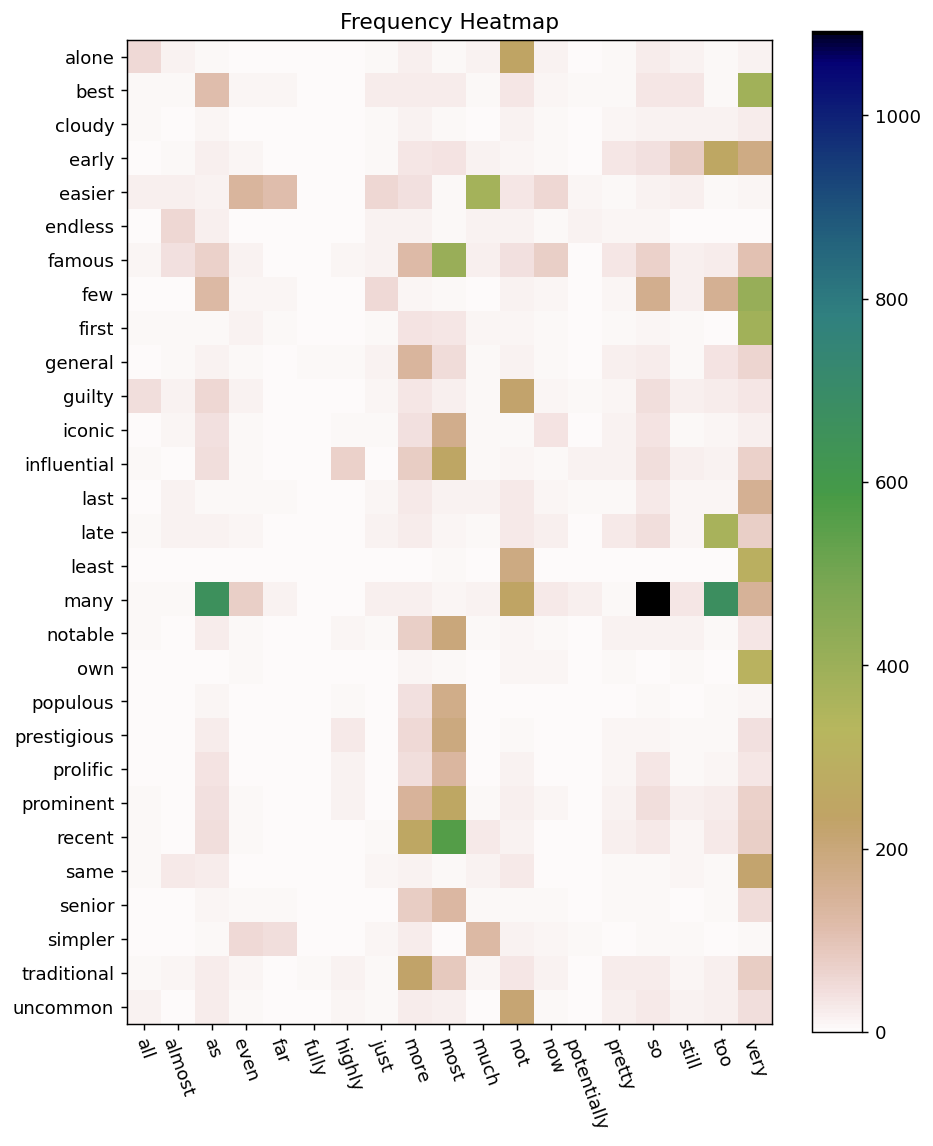

In [32]:
heatmap(transform(drop_sums(adj_outlier_df.iloc[:30, :20]), method='sqrt'))

In [33]:
def get_axis_intersections(df_1, df_2):
    df_1 = drop_sums(df_1)
    df_2 = drop_sums(df_2)
    
    return {
    df_1.columns.name : set(df_1.columns.to_list()).intersection(df_2.columns.to_list()),
    df_1.index.name : set(df_1.index.to_list()).intersection(df_2.index.to_list())
    }
    
variable_and_preferred = get_axis_intersections(adv_outlier_df, adj_outlier_df)
print_iter(variable_and_preferred)


▸ adv_form_lower:	{'partly', 'bone', 'thinly', 'scantily', 'kind'}
▸ adj_form_lower:	{'best', 'veiled', 'same', 'marrow', 'cloudy', 'clad'}


In [34]:
def square_sample(df: pd.DataFrame, n: int = 10, with_margin: bool = True):
    _df = drop_sums(df.copy())
    rows = _df.index.to_series().sample(n).to_list()
    cols = _df.columns.to_series().sample(n).to_list()
    if with_margin:
        rows.insert(0, 'SUM')
        cols.insert(0, 'SUM')
    return df.loc[rows, cols]

square_sample(adv_outlier_df)

adv_form_lower,SUM,inversely,cautiously,wide,morbidly,diametrically,funnily,unacceptably,dimly,infinitesimally,confusingly
adj_form_lower,,,,,,,,,,,
SUM,83284343,2435,11204,32734,4373,1178,904,4205,2310,1069,1061
advanced,143274,0,1,0,0,0,0,0,0,0,0
important,2199447,0,1,1,0,0,0,0,0,0,0
mobile,22263,0,0,0,0,0,0,0,0,0,0
best,208298,0,0,0,0,0,0,0,0,0,0
veiled,2056,0,0,0,0,0,0,0,0,0,0
populated,2956,0,0,0,0,0,0,0,0,0,0
possible,362284,0,0,0,0,0,0,0,2,0,0
present,125577,0,2,0,0,0,0,0,10,0,0


In [35]:
WITH_SUM = True
ex_3x3 = square_sample(
    df_clean.loc[~df_clean.index.isin(['much','most', 'less', 'least', 'best','more','own','worth']), 
                 ~df_clean.columns.isin(['not', 'long', 'plain', 'once', 'now', 'way',"n't",'no','then','just',
                                         'almost','all','about','mostly','most','much','more','as','so','well']) ].filter(regex=r'[^e]r|[^r]$', axis=0).iloc[:200, :150], 
                       n=3, with_margin=WITH_SUM)
ex_3x3.to_csv(f'/share/compling/projects/sanpi/info/samples/freq_3x3{".with-sum" if WITH_SUM else ""}.{tnow()}.csv')
ex_3x3

adv_form_lower,SUM,legally,vastly,never
adj_form_lower,,,,
SUM,83284343,36949,40275,129653
aware,319201,8,8,560
young,226113,1,0,37
complicated,179503,81,105,36


In [36]:
print_ex = ex_3x3.copy()
print_ex.index.name=None
print_ex.index = '***' + print_ex.index + '***'
print_ex.columns = '*' + print_ex.columns + '*'
print(print_md_table(print_ex.rename(columns={'*SUM*': '`SUM`'}, index={'***SUM***': '**`SUM`**'}), suppress=True))

|                   |      `SUM` |   *legally* |   *vastly* |   *never* |
|:------------------|-----------:|------------:|-----------:|----------:|
| **`SUM`**         | 83,284,343 |      36,949 |     40,275 |   129,653 |
| ***aware***       |    319,201 |           8 |          8 |       560 |
| ***young***       |    226,113 |           1 |          0 |        37 |
| ***complicated*** |    179,503 |          81 |        105 |        36 |



|                 |      `SUM` |   *seemingly* |   *commercially* |   *strictly* |
|:----------------|-----------:|--------------:|-----------------:|-------------:|
| **`SUM`**       | 83,284,343 |       162,309 |           33,305 |       35,061 |
| ***efficient*** |    254,637 |            13 |               12 |            1 |
| ***personal***  |    126,037 |            87 |                0 |          499 |
| ***great***     |    379,200 |           184 |                3 |            1 |


In [37]:
# import association_measures.measures as am
# import association_measures.frequencies as fq
# from source.utils.lsc_prep import flatten_freq_table as prep_freqs
# prep_freqs(ex_3x3)

In [38]:
N=ex_3x3.at['SUM', 'SUM']
N


83284343

In [39]:
adv_margins = f1 = ex_3x3.iloc[0, 1:].T.to_frame('f1').reset_index()
adv_margins


,adv_form_lower,f1
0,legally,36949
1,vastly,40275
2,never,129653


In [40]:
adj_margins = f2 = ex_3x3.iloc[1:, 0].to_frame('f2').reset_index()
adj_margins

,adj_form_lower,f2
0,aware,319201
1,young,226113
2,complicated,179503


In [41]:
_ex_3x3 = drop_sums(ex_3x3.copy())
_ex_3x3

adv_form_lower,legally,vastly,never
adj_form_lower,,,
aware,8,8,560
young,1,0,37
complicated,81,105,36


In [42]:
_ex_3x3 = _ex_3x3.unstack().to_frame('f').reset_index()
_ex_3x3

,adv_form_lower,adj_form_lower,f
0,legally,aware,8
1,legally,young,1
2,legally,complicated,81
3,vastly,aware,8
4,vastly,young,0
5,vastly,complicated,105
6,never,aware,560
7,never,young,37
8,never,complicated,36


In [43]:
def merge_margins(df, margins):
    margin_unit = margins.columns[0]
    return df.merge(margins, 
                    left_on=margin_unit, 
                    right_on=margin_unit)
    
_ex_3x3 = merge_margins(merge_margins(_ex_3x3, f1), f2)
_ex_3x3

,adv_form_lower,adj_form_lower,f,f1,f2
0,legally,aware,8,36949,319201
1,vastly,aware,8,40275,319201
2,never,aware,560,129653,319201
3,legally,young,1,36949,226113
4,vastly,young,0,40275,226113
5,never,young,37,129653,226113
6,legally,complicated,81,36949,179503
7,vastly,complicated,105,40275,179503
8,never,complicated,36,129653,179503


In [44]:
_ex_3x3 = _ex_3x3.assign(
    bigram=_ex_3x3.iloc[:, 0] + '_' + _ex_3x3.iloc[:, 1],
    N=N)
_ex_3x3

,adv_form_lower,adj_form_lower,f,f1,f2,bigram,N
0,legally,aware,8,36949,319201,legally_aware,83284343
1,vastly,aware,8,40275,319201,vastly_aware,83284343
2,never,aware,560,129653,319201,never_aware,83284343
3,legally,young,1,36949,226113,legally_young,83284343
4,vastly,young,0,40275,226113,vastly_young,83284343
5,never,young,37,129653,226113,never_young,83284343
6,legally,complicated,81,36949,179503,legally_complicated,83284343
7,vastly,complicated,105,40275,179503,vastly_complicated,83284343
8,never,complicated,36,129653,179503,never_complicated,83284343


In [45]:
full_frq_ex = _ex_3x3.join(fq.observed_frequencies(_ex_3x3)).join(fq.expected_frequencies(_ex_3x3))
full_frq_ex

NameError: name 'fq' is not defined

In [ ]:
frq_row = full_frq_ex.sample(1).set_index('bigram')
frq_row.update(frq_row.select_dtypes('number').round(1))
frq_row.T

bigram,strictly_efficient
adv_form_lower,strictly
adj_form_lower,efficient
f,1
f1,35061
f2,254637
N,83284343
O11,1
O12,35060
O21,254636
O22,82994646


In [ ]:
def print_contingencies_for_bigram(frq_row:pd.Series or pd.DataFrame) -> None:
    frq_row= frq_row.squeeze()

    contingency_md = f'''
### Observed Contingencies for *{frq_row["adv_form_lower"]}* + *{frq_row["adj_form_lower"]}*

|    | *{frq_row["adj_form_lower"]}* | $\\neg$ *{frq_row["adj_form_lower"]}* | across all `ADV` |
|---:|---:|---:|---:|
| ***{frq_row["adv_form_lower"]}*** | {frq_row["O11"]:,.0f} | {frq_row["O12"]:,.0f} | {frq_row["f1"]:,.0f} |
| **$\\neg$ *{frq_row["adv_form_lower"]}*** | {frq_row["O21"]:,.0f} | {frq_row["O22"]:,.0f} | {frq_row["O21"] + frq_row["O22"]:,.0f} |
| **across all `ADJ`** | {frq_row["f2"]:,.0f} | {frq_row["O12"] + frq_row["O22"]:,.0f} | {N:,.0f} |'''
    
    print(contingency_md)



### Observed Contingencies for *strictly* + *personal*

|    | *personal* | $\neg$ *personal* | across all `ADV` |
|---:|---:|---:|---:|
| ***strictly*** | 499 | 34,562 | 35,061 |
| **$\neg$ *strictly*** | 125,538 | 83,123,744 | 83,249,282 |
| **across all `ADJ`** | 126,037 | 83,158,306 | 83,284,343 |



### Observed Contingencies for *strictly* + *personal*

|    | *personal* | $\neg$ *personal* | across all `ADV` |
|---:|---:|---:|---:|
| ***strictly*** | 499 | 34,562 | 35,061 |
| **$\neg$ *strictly*** | 125,538 | 83,123,744 | 83,249,282 |
| **across all `ADJ`** | 126,037 | 83,158,306 | 83,284,343 |


In [ ]:
full_frq_ex.apply(print_contingencies_for_bigram, axis=1)


### Observed Contingencies for *seemingly* + *efficient*

|    | *efficient* | $\neg$ *efficient* | across all `ADV` |
|---:|---:|---:|---:|
| ***seemingly*** | 13 | 162,296 | 162,309 |
| **$\neg$ *seemingly*** | 254,624 | 82,867,410 | 83,122,034 |
| **across all `ADJ`** | 254,637 | 83,029,706 | 83,284,343 |

### Observed Contingencies for *commercially* + *efficient*

|    | *efficient* | $\neg$ *efficient* | across all `ADV` |
|---:|---:|---:|---:|
| ***commercially*** | 12 | 33,293 | 33,305 |
| **$\neg$ *commercially*** | 254,625 | 82,996,413 | 83,251,038 |
| **across all `ADJ`** | 254,637 | 83,029,706 | 83,284,343 |

### Observed Contingencies for *strictly* + *efficient*

|    | *efficient* | $\neg$ *efficient* | across all `ADV` |
|---:|---:|---:|---:|
| ***strictly*** | 1 | 35,060 | 35,061 |
| **$\neg$ *strictly*** | 254,636 | 82,994,646 | 83,249,282 |
| **across all `ADJ`** | 254,637 | 83,029,706 | 83,284,343 |

### Observed Contingencies for *seemingly* + *personal*

|    | *

0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
dtype: object


### Observed Contingencies for *seemingly* + *efficient*

|    | *efficient* | $\neg$ *efficient* | across all `ADV` |
|---:|---:|---:|---:|
| ***seemingly*** | 13 | 162,296 | 162,309 |
| **$\neg$ *seemingly*** | 254,624 | 82,867,410 | 83,122,034 |
| **across all `ADJ`** | 254,637 | 83,029,706 | 83,284,343 |

### Observed Contingencies for *commercially* + *efficient*

|    | *efficient* | $\neg$ *efficient* | across all `ADV` |
|---:|---:|---:|---:|
| ***commercially*** | 12 | 33,293 | 33,305 |
| **$\neg$ *commercially*** | 254,625 | 82,996,413 | 83,251,038 |
| **across all `ADJ`** | 254,637 | 83,029,706 | 83,284,343 |

### Observed Contingencies for *strictly* + *efficient*

|    | *efficient* | $\neg$ *efficient* | across all `ADV` |
|---:|---:|---:|---:|
| ***strictly*** | 1 | 35,060 | 35,061 |
| **$\neg$ *strictly*** | 254,636 | 82,994,646 | 83,249,282 |
| **across all `ADJ`** | 254,637 | 83,029,706 | 83,284,343 |

### Observed Contingencies for *seemingly* + *personal*

|    | *personal* | $\neg$ *personal* | across all `ADV` |
|---:|---:|---:|---:|
| ***seemingly*** | 87 | 162,222 | 162,309 |
| **$\neg$ *seemingly*** | 125,950 | 82,996,084 | 83,122,034 |
| **across all `ADJ`** | 126,037 | 83,158,306 | 83,284,343 |

### Observed Contingencies for *commercially* + *personal*

|    | *personal* | $\neg$ *personal* | across all `ADV` |
|---:|---:|---:|---:|
| ***commercially*** | 0 | 33,305 | 33,305 |
| **$\neg$ *commercially*** | 126,037 | 83,125,001 | 83,251,038 |
| **across all `ADJ`** | 126,037 | 83,158,306 | 83,284,343 |

### Observed Contingencies for *strictly* + *personal*

|    | *personal* | $\neg$ *personal* | across all `ADV` |
|---:|---:|---:|---:|
| ***strictly*** | 499 | 34,562 | 35,061 |
| **$\neg$ *strictly*** | 125,538 | 83,123,744 | 83,249,282 |
| **across all `ADJ`** | 126,037 | 83,158,306 | 83,284,343 |

### Observed Contingencies for *seemingly* + *great*

|    | *great* | $\neg$ *great* | across all `ADV` |
|---:|---:|---:|---:|
| ***seemingly*** | 184 | 162,125 | 162,309 |
| **$\neg$ *seemingly*** | 379,016 | 82,743,018 | 83,122,034 |
| **across all `ADJ`** | 379,200 | 82,905,143 | 83,284,343 |

### Observed Contingencies for *commercially* + *great*

|    | *great* | $\neg$ *great* | across all `ADV` |
|---:|---:|---:|---:|
| ***commercially*** | 3 | 33,302 | 33,305 |
| **$\neg$ *commercially*** | 379,197 | 82,871,841 | 83,251,038 |
| **across all `ADJ`** | 379,200 | 82,905,143 | 83,284,343 |

### Observed Contingencies for *strictly* + *great*

|    | *great* | $\neg$ *great* | across all `ADV` |
|---:|---:|---:|---:|
| ***strictly*** | 1 | 35,060 | 35,061 |
| **$\neg$ *strictly*** | 379,199 | 82,870,083 | 83,249,282 |
| **across all `ADJ`** | 379,200 | 82,905,143 | 83,284,343 |
